<a href="https://colab.research.google.com/github/Jac0bLii/Chenxi-Li-1007405880--STA365HW/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chenxi Li 1007405880


Part 1

In [ ]:
import pymc as pm; import numpy as np
from google.colab import drive
import pandas as pd
import os
import arviz as az
from google.colab import drive

os.environ['MKL_THREADING_LAYER'] = 'GNU'
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')
data = pd.read_csv("insurance.csv")
data['smoker'] = data['smoker'].replace({'yes': 1, 'no': 0})
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      age     sex     bmi  children  smoker     region      charges
0      19  female  27.900         0       1  southwest  16884.92400
1      18    male  33.770         1       0  southeast   1725.55230
2      28    male  33.000         3       0  southeast   4449.46200
3      33    male  22.705         0       0  northwest  21984.47061
4      32    male  28.880         0       0  northwest   3866.85520
...   ...     ...     ...       ...     ...        ...          ...
1333   50    male  30.970         3       0  northwest  10600.54830
1334   18  female  31.920         0       0  northeast   2205.98080
1335   18  female  36.850         0       0  southeast   1629.83350
1336   21  female  25.800         0       0  southwest   2007.94500
1337   61  female  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
data = data.dropna()
y = data[["smoker"]]
X = data[["bmi", "age", "charges"]].values
n = X.shape[0]
p = X.shape[1]
y = y.astype(bool)

In [ ]:
with pm.Model() as logistic_model:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    sigma = pm.HalfCauchy('sigma', beta=1)  # Intercept

    # Logistic link function
    # Logistic link function
    p = pm.math.sigmoid(alpha + pm.math.dot(X, betas))

    # Bernoulli likelihood
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

with logistic_model:
    idata = pm.sample()
pm.summary(idata)

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:585: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:585: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:585: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in scalar divide

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",-0.257,0.402,-0.659,0.145,0.283,0.239,2.0,2.0,NaN
"betas[0, 1]",0.710,0.266,0.444,0.975,0.187,0.158,2.0,2.0,NaN
"betas[0, 2]",0.427,0.039,0.388,0.466,0.027,0.023,2.0,2.0,NaN
"betas[1, 0]",0.612,0.161,0.450,0.773,0.113,0.096,2.0,2.0,NaN
"betas[1, 1]",-0.483,0.007,-0.490,-0.476,0.005,0.004,2.0,2.0,NaN
"betas[1, 2]",0.132,0.699,-0.567,0.831,0.492,0.416,2.0,2.0,NaN
"betas[2, 0]",-0.319,0.562,-0.881,0.243,0.396,0.335,2.0,2.0,NaN
"betas[2, 1]",-0.186,0.715,-0.900,0.529,0.503,0.426,2.0,2.0,NaN
"betas[2, 2]",-0.669,0.161,-0.830,-0.508,0.113,0.096,2.0,2.0,NaN
alpha,0.211,0.170,0.042,0.381,0.119,0.101,2.0,2.0,NaN


/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

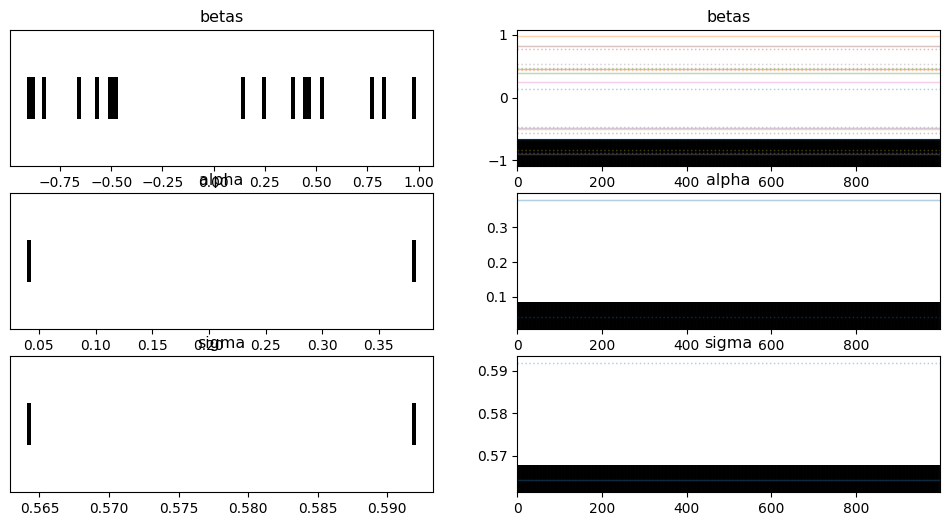

In [ ]:
az.plot_trace(idata)

Part 2

Chenxi Li
1007405880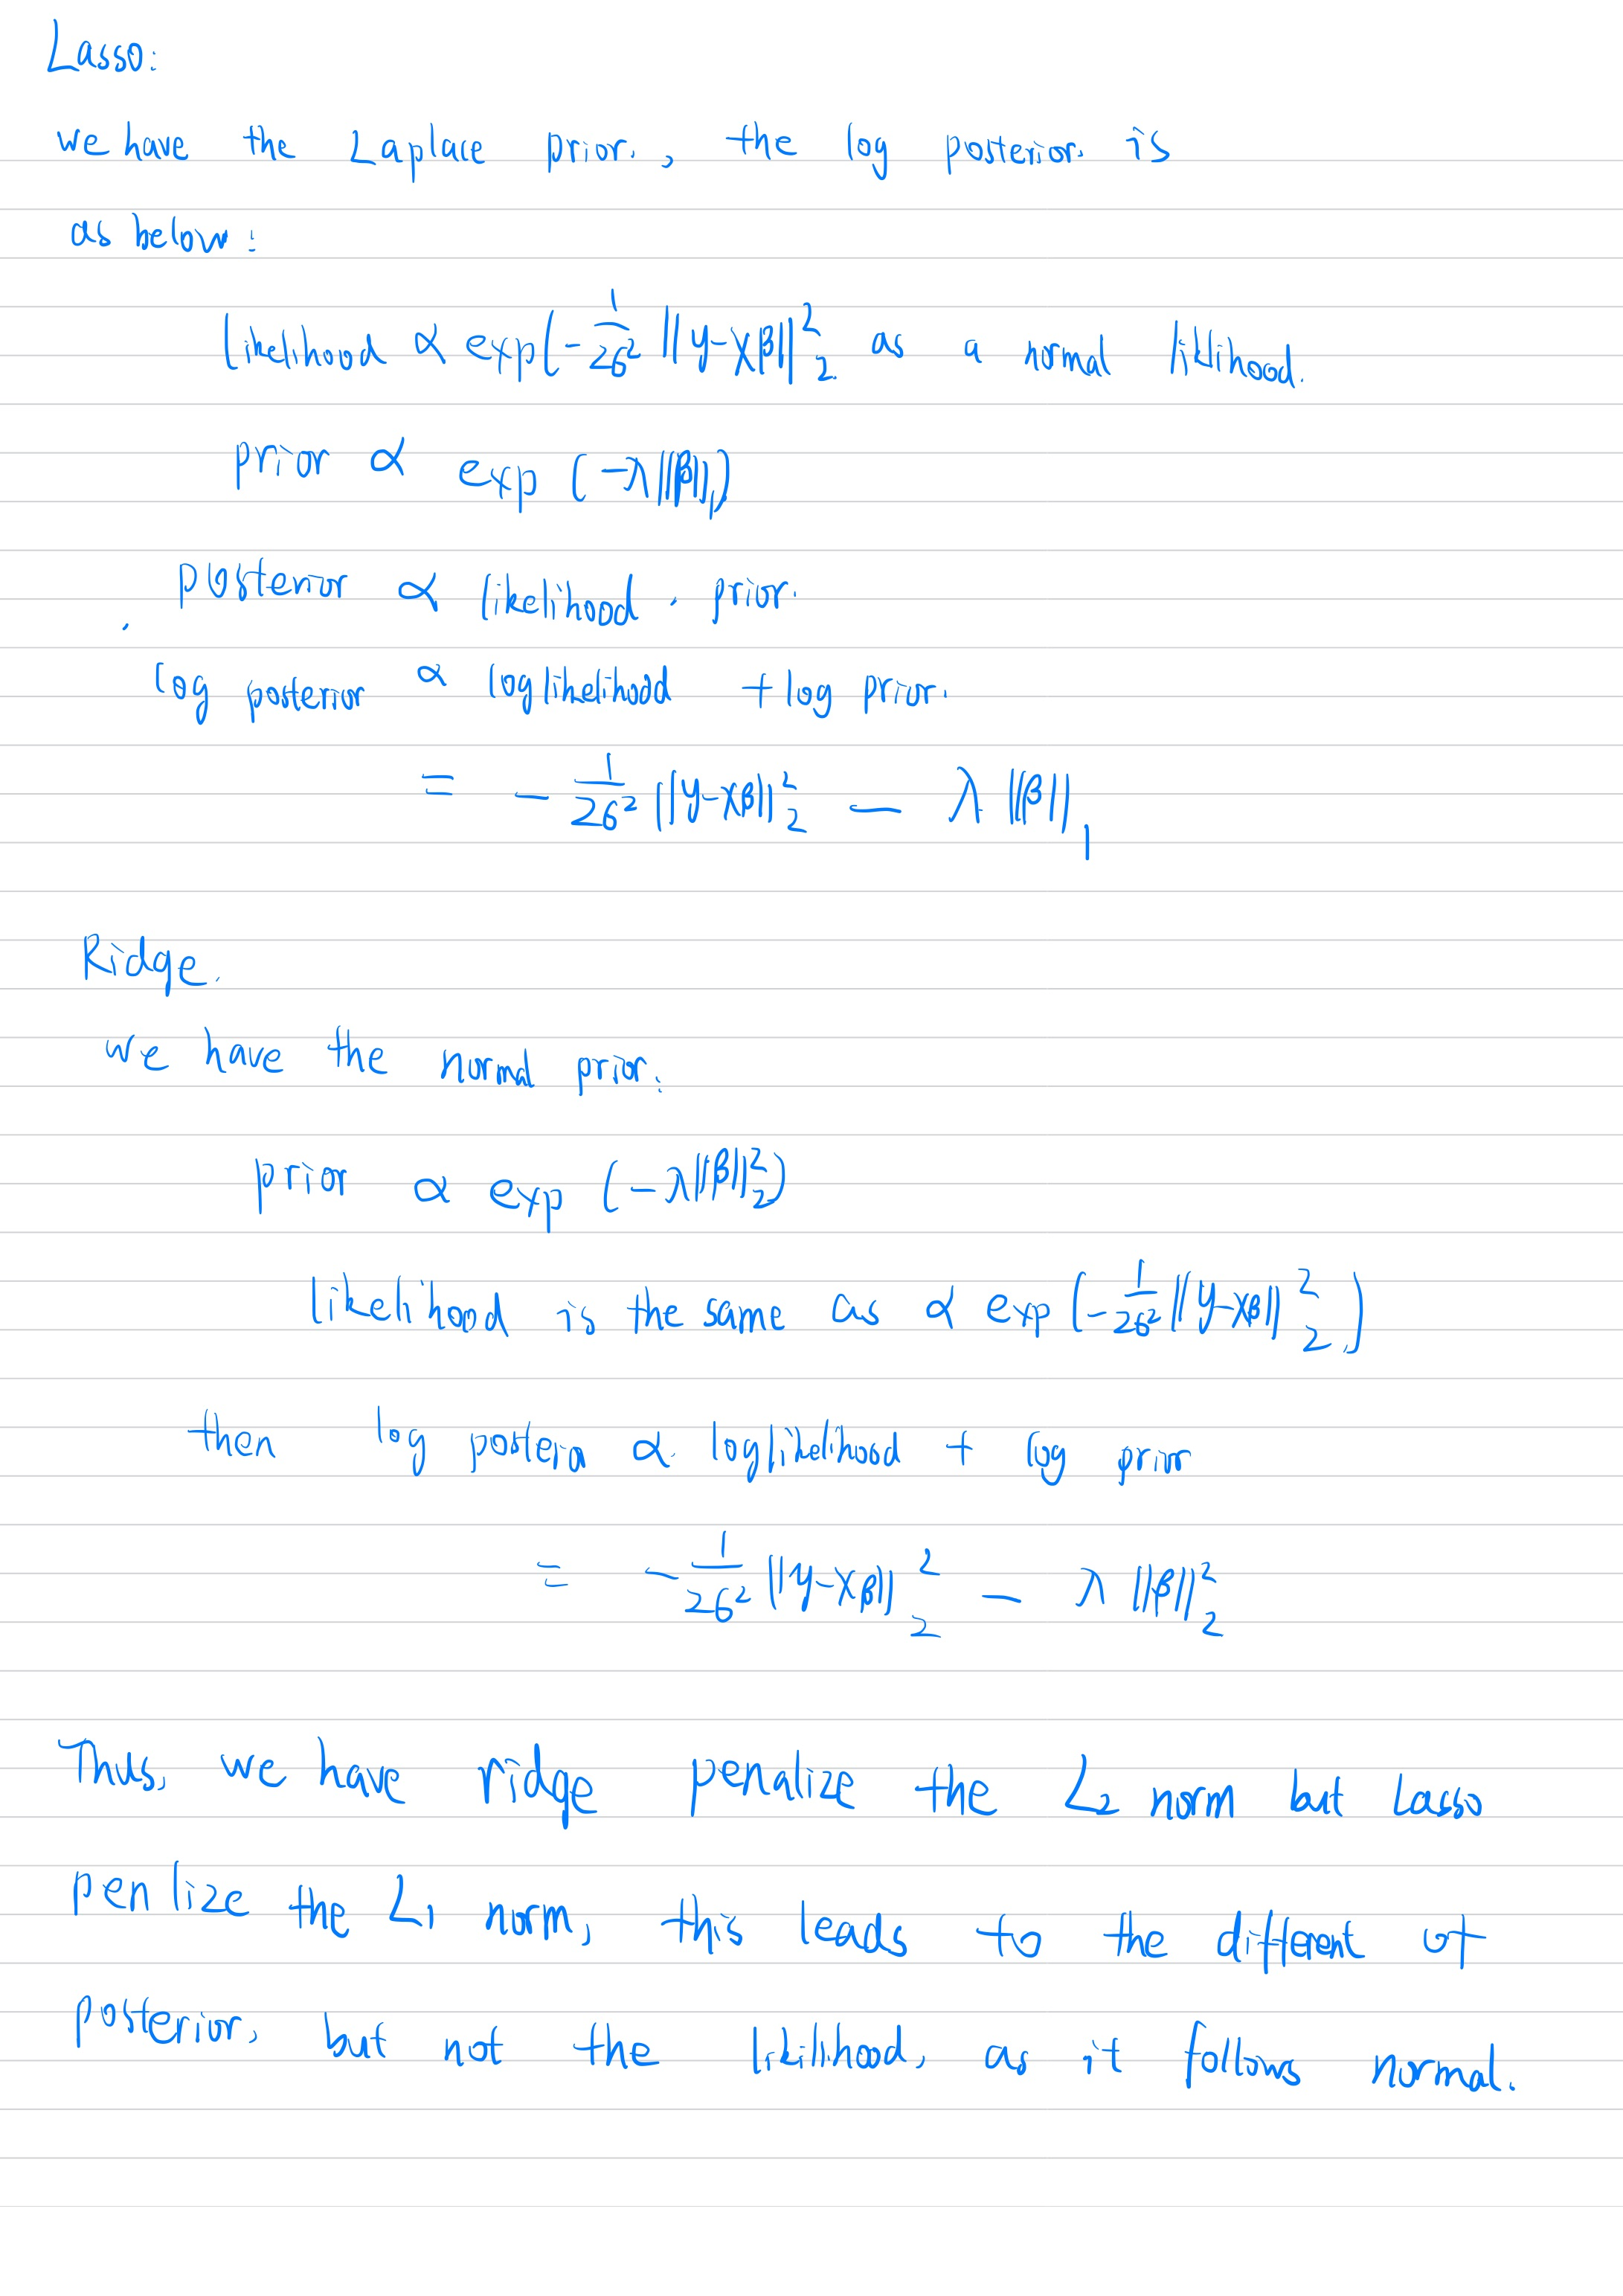